# License
***
Copyright (C) 2017 -- 2025 J. Patrick Hall, jphall@gwu.edu and N M Emran Hussain (nmemran.hussain@gwu.edu)

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Installs and Imports

1. Standard Python imports

In [ ]:
import pandas as pd # import pandas for easy data manipulation using data frames

from matplotlib import pyplot as plt # plotting
import seaborn as sns                # slightly better plotting

# for model eval
from sklearn.metrics import accuracy_score, f1_score, log_loss, mean_squared_error, roc_auc_score

# to upload g-drive files
from google.colab import drive

2. Install Java - DEPRECATED/do not run

In [ ]:
# install Java for h2o backend
#!apt-get install default-jre
#!java -version

3. Install H2O

In [ ]:
# install h2o
!pip install h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 5.3 MB/s eta 0:00:00


In [ ]:
# version
import h2o

h2o.__version__

'3.46.0.7'

4. Import h2o package and required classes

In [ ]:
# import h2o and required classes
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

## Load and explore example data

5. Upload class example data

In [ ]:
drive.mount('/content/drive/', force_remount=True)
# MAY REQUIRE STUDENT INPUT
%cd /content/drive/MyDrive/AI_Workshop/01_Regression_Materials/
%ls

Mounted at /content/drive/
/content/drive/MyDrive/AI_Workshop/01_Regression_Materials
'Assignment 1.ipynb'   L2_gradient_descent.ipynb   loan_clean.csv


In [ ]:
# 6
# DEPRECATED/do not run
# uploaded.keys() # what is stored in that Python object?

7. Covert to Pandas DataFrame

In [ ]:
raw = pd.read_csv('loan_clean.csv')

8. Summary and descriptive statistics

In [ ]:
# summary and descriptive statistics
raw.describe()

,id,bad_loan,GRP_REP_home_ownership,GRP_addr_state,GRP_home_ownership,GRP_purpose,GRP_verification_status,_WARN_,STD_IMP_REP_annual_inc,STD_IMP_REP_delinq_2yrs,STD_IMP_REP_dti,STD_IMP_REP_emp_length,STD_IMP_REP_int_rate,STD_IMP_REP_loan_amnt,STD_IMP_REP_longest_credit_lengt,STD_IMP_REP_revol_util,STD_IMP_REP_term_length,STD_IMP_REP_total_acc
count,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,0.0,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05
mean,91994.000000,0.192595,2.574003,11.409337,2.574003,3.244940,2.340356,NaN,2.387445e-11,2.295883e-12,6.807003e-11,-3.566870e-11,-8.948889e-12,8.311941e-11,5.061255e-11,-1.473410e-11,-1.500954e-10,8.061607e-13
std,47339.113634,0.394338,0.667526,9.971926,0.667526,2.267289,0.504086,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,10001.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,-1.767456e+00,-3.921962e-01,-2.119639e+00,-1.621390e+00,-1.907046e+00,-1.587129e+00,-2.224451e+00,-2.164541e+00,-5.164956e-01,-2.058862e+00
25%,50997.500000,0.000000,2.000000,3.000000,2.000000,2.000000,2.000000,NaN,-6.595203e-01,-3.921962e-01,-7.380602e-01,-7.663281e-01,-6.840838e-01,-7.667612e-01,-7.212383e-01,-7.235035e-01,-5.164956e-01,-7.471426e-01
50%,91994.000000,0.000000,3.000000,8.000000,3.000000,2.000000,2.000000,NaN,-2.225562e-01,-3.921962e-01,-2.257573e-02,8.873407e-02,-5.191344e-02,-2.114351e-01,-1.199531e-01,7.707309e-02,-5.164956e-01,-1.350069e-01
75%,132990.500000,0.000000,3.000000,17.000000,3.000000,3.000000,3.000000,NaN,3.686305e-01,-3.921962e-01,6.955785e-01,1.228817e+00,5.917510e-01,6.215541e-01,4.813321e-01,7.815805e-01,-5.164956e-01,5.645768e-01
max,173987.000000,1.000000,5.000000,37.000000,5.000000,14.000000,3.000000,NaN,4.618062e+00,4.156695e+00,3.037149e+00,1.228817e+00,2.837680e+00,2.767132e+00,3.143160e+00,3.036350e+00,1.971879e+00,3.068467e+00


9. View histograms

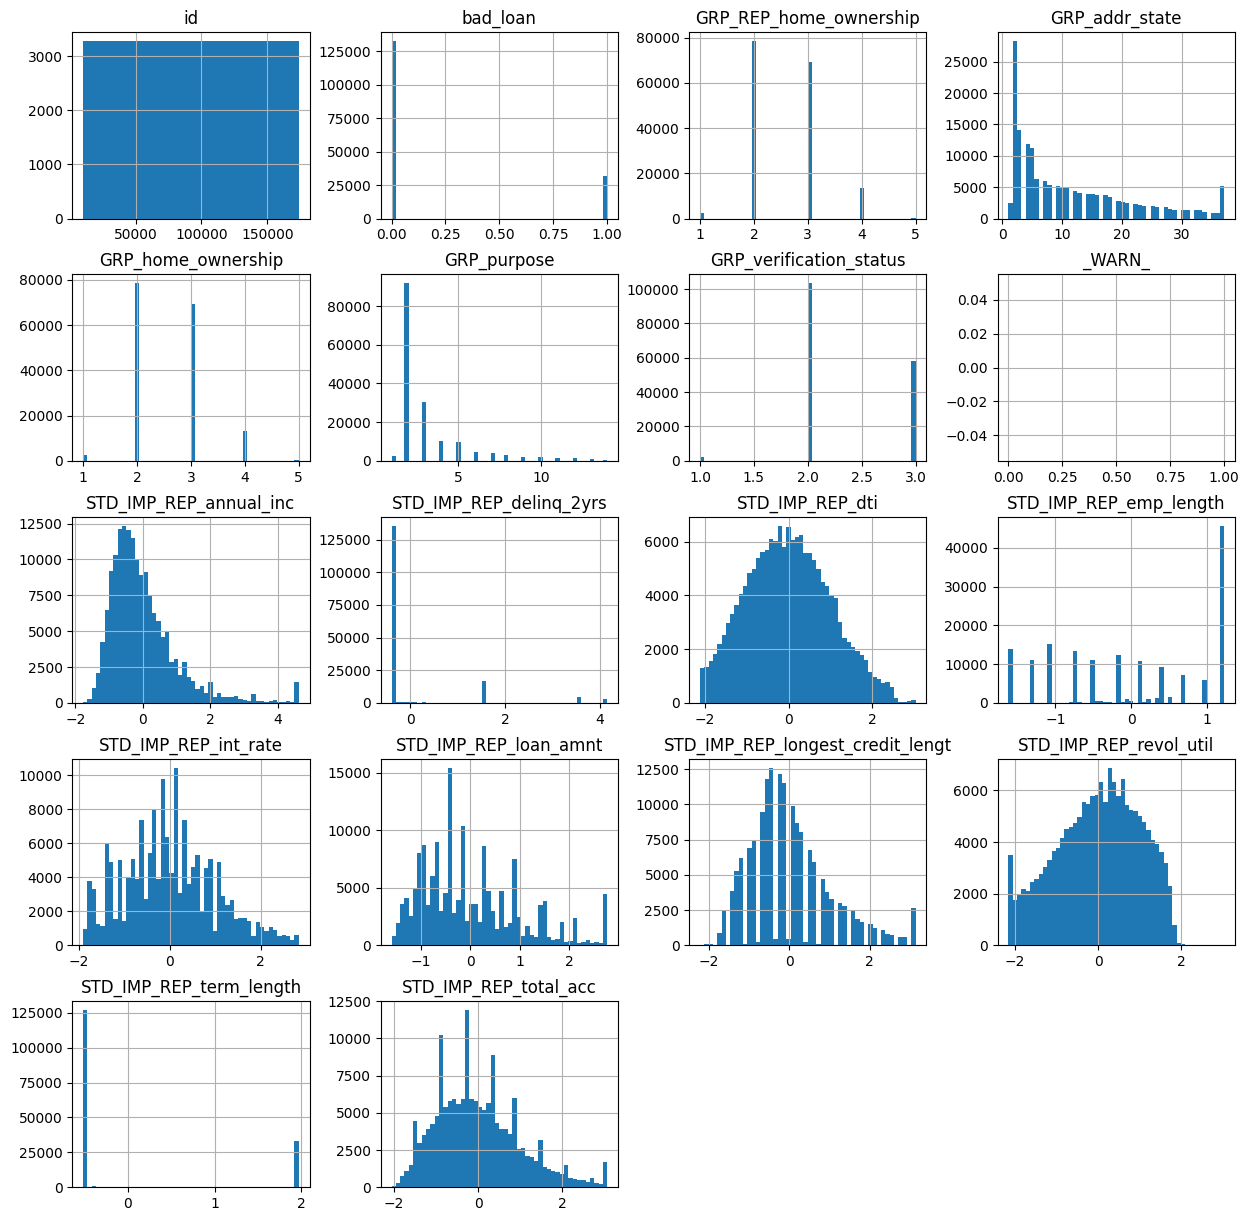

In [ ]:
_ = raw[raw.columns].hist(bins=50, figsize=(15, 15)) # display histograms

10. View correlation heatmap

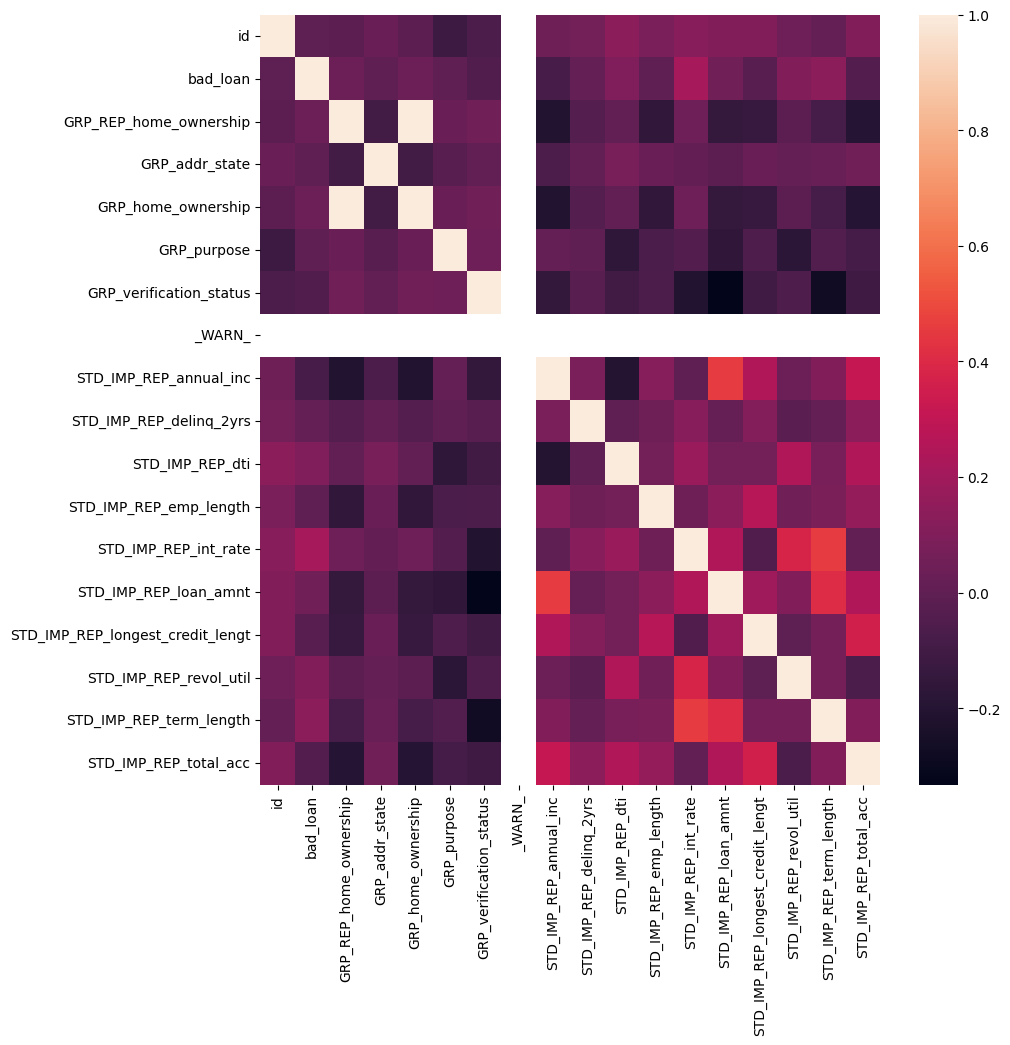

In [ ]:
# correlation heatmap
corr = raw.corr()
plt.figure(figsize=(10, 10))
_ = sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

## Train penalized GLM model to predict loan default

11. Assign global constants

In [ ]:
# REQUIRES STUDENT INPUT
x_names = ['GRP_REP_home_ownership', 'GRP_addr_state', 'GRP_purpose', 'GRP_verification_status', 'STD_IMP_REP_annual_inc', 'STD_IMP_REP_delinq_2yrs', 'STD_IMP_REP_dti', 'STD_IMP_REP_emp_length', 'STD_IMP_REP_int_rate', 'STD_IMP_REP_loan_amnt', 'STD_IMP_REP_longest_credit_lengt', 'STD_IMP_REP_revol_util', 'STD_IMP_REP_term_length', 'STD_IMP_REP_total_acc']
y_name = 'bad_loan'

12. Start h2o server

In [ ]:
# start h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbr_zvzx3
  JVM stdout: /tmp/tmpbr_zvzx3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbr_zvzx3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 2 days
H2O_cluster_name:,H2O_from_python_unknownUser_9v8025
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


13. Function for penalized GLM training that selects good alpha and lamda

In [ ]:
def glm_grid(x_names, y_name, htrain, hvalid=None, seed_=309):

    """ Wrapper function for penalized GLM with alpha and lambda search.
    :param x_names: List of inputs.
    :param y_name: Name of target variable.
    :param htrain: Training H2OFrame.
    :param hvalid: Validation H2OFrame, default None.
    :param seed_: Random seed for better reproducibility, default 12345.
    :return: Best H2OGeneralizedLinearEstimator.
    """

    alpha_opts = [0.01, 0.25, 0.5, 0.99]  # REQUIRES STUDENT INPUT

    # define search criteria
    # i.e., over alpha
    # lamda search handled by lambda_search param below
    hyper_parameters = {'alpha': alpha_opts}

    # initialize grid search
    grid = H2OGridSearch(
        H2OGeneralizedLinearEstimator(family="binomial",
                                      lambda_search=True,
                                      seed=seed_),
        hyper_params=hyper_parameters)

    # execute training w/ grid search
    grid.train(y=y_name,
               x=x_names,
               training_frame=htrain,
               validation_frame=hvalid,
               seed=seed_)

    # select best model from grid search
    best_model = grid.get_grid()[0]
    del grid

    return best_model


14. Convert from Pandas DataFrame to H2OFrame

In [ ]:
train = h2o.H2OFrame(raw) # load Pandas DataFrame in H2OFrame
train[y_name] = train[y_name].asfactor() # ensures h2o treats y/target as categorical and not numeric

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


15. Train model using `glm_grid` function

In [ ]:
loan_glm = glm_grid(x_names=x_names, y_name=y_name, htrain=train) # REQUIRES STUDENT INPUT

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/grid/grid_search.py:434: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch. This is due to the fact that the algo has to run initialization for every alpha value. Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message)


16. Print learned coefficients

In [ ]:
# Extract and format model parameters into a table
coef_dict = loan_glm.coef()
coef_df = pd.DataFrame(coef_dict.items(), columns=['Coefficient Name', 'Values'])

# Display the table
print("Model Parameters Table:\n")
print(coef_df.to_string(index=False))

Model Parameters Table:

                Coefficient Name    Values
                       Intercept -1.667429
          GRP_REP_home_ownership  0.051418
                  GRP_addr_state -0.002136
                     GRP_purpose  0.026545
         GRP_verification_status -0.031662
          STD_IMP_REP_annual_inc -0.224994
         STD_IMP_REP_delinq_2yrs  0.017391
                 STD_IMP_REP_dti  0.143042
          STD_IMP_REP_emp_length -0.009850
            STD_IMP_REP_int_rate  0.392455
           STD_IMP_REP_loan_amnt  0.085834
STD_IMP_REP_longest_credit_lengt  0.010190
          STD_IMP_REP_revol_util  0.087823
         STD_IMP_REP_term_length  0.127814
           STD_IMP_REP_total_acc -0.104755


17. View elastic net trace plot

/tmp/ipython-input-19-1547761243.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reg_path_frame = pd.concat([reg_path_frame, pd.DataFrame(reg_path_dict['coefficients'][i], index=[i])], axis=0)


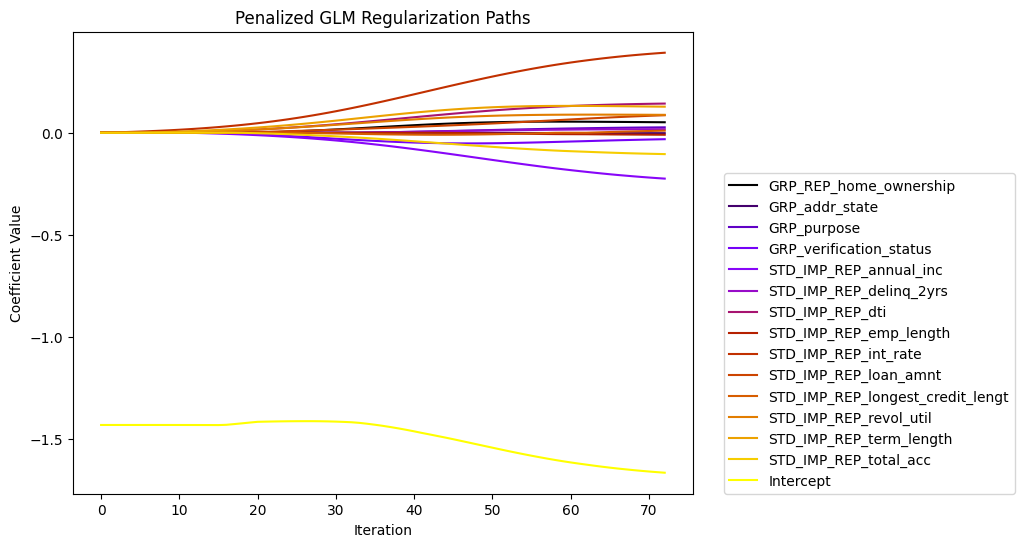

In [ ]:
# view trace plot

# collect regularization paths from dict in DataFrame
reg_path_dict = loan_glm.getGLMRegularizationPath(loan_glm)
reg_path_frame = pd.DataFrame(columns=reg_path_dict['coefficients'][0].keys())
for i in range(0, len(reg_path_dict['coefficients'])):
    reg_path_frame = pd.concat([reg_path_frame, pd.DataFrame(reg_path_dict['coefficients'][i], index=[i])], axis=0)

# plot regularization paths
fig, ax_ = plt.subplots(figsize=(8, 6))
_ = reg_path_frame.plot(kind='line', ax=ax_, title='Penalized GLM Regularization Paths',
                                      colormap='gnuplot')
_ = ax_.set_xlabel('Iteration')
_ = ax_.set_ylabel('Coefficient Value')
_ = plt.legend(bbox_to_anchor=(1.05, 0),
               loc=3,
               borderaxespad=0.)

18. Assign most important feature for evaluation below

In [ ]:
# REQUIRES STUDENT INPUT
# Get the model coefficients (includes intercept)
coefficients = loan_glm.coef()

# Remove intercept (usually named 'Intercept' or '(Intercept)')
coefficients_no_intercept = {k: v for k, v in coefficients.items() if k.lower() != 'intercept'}

# Find the feature with the highest absolute coefficient value
most_important_feature = max(coefficients_no_intercept, key=lambda k: abs(coefficients_no_intercept[k]))

# Print and assign the most important feature
print(f"Most important feature: {most_important_feature} with coefficient value: {coefficients_no_intercept[most_important_feature]}")


Most important feature: STD_IMP_REP_int_rate with coefficient value: 0.3924545925097718


19. Print AUC statistic

In [ ]:
# print AUC
print('AUC: %.4f' % loan_glm.auc())

AUC: 0.6789


20. View ten rows of actual vs. predicted

In [ ]:
raw['P_bad_loan'] = loan_glm.predict(train)['p1'].as_data_frame() # place prediction into a Pandas Dataframe
raw[[y_name, 'P_bad_loan']].head(n=10) # view actual vs. predicted

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,bad_loan,P_bad_loan
0,0,0.228377
1,1,0.245866
2,0,0.278425
3,0,0.171208
4,0,0.131085
5,0,0.289813
6,1,0.379009
7,1,0.287796
8,0,0.200557
9,0,0.139713


21. View actual vs. predicted for most important feature

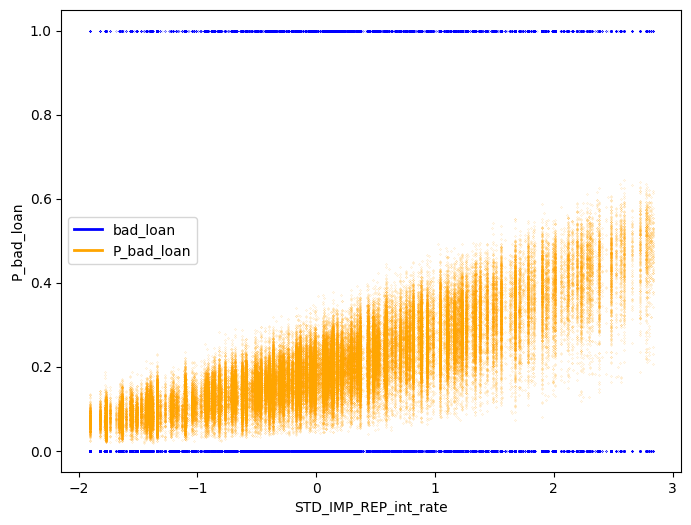

In [ ]:
# display y vs. yhat for visual evaluation
fig, ax_ = plt.subplots(figsize=(8, 6))
_ = raw.plot(kind='scatter', x=most_important_feature, y=y_name, s=0.01, color='blue', ax=ax_)
_ = raw.plot(kind='scatter', x=most_important_feature, y='P_bad_loan', s=0.01, color='orange', ax=ax_)

# add custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='orange', lw=2)]
_ = ax_.legend(custom_lines, [y_name, 'P_bad_loan'])

22. Generate a prediction for a new customer

In [ ]:
# predict on new data -- REQUIRES STUDENT INPUT
new_row = h2o.H2OFrame({
  "GRP_REP_home_ownership": 3,
  "GRP_addr_state": 20,
  "GRP_purpose": 5,
  "GRP_verification_status": 3,
  "STD_IMP_REP_annual_inc": 1,
  "STD_IMP_REP_delinq_2yrs": 5,
  "STD_IMP_REP_dti": 3,
  "STD_IMP_REP_emp_length": -2,
  "STD_IMP_REP_int_rate": 4,
  "STD_IMP_REP_loan_amnt": 3,
  "STD_IMP_REP_longest_credit_length": 4,
  "STD_IMP_REP_revol_util": 3,
  "STD_IMP_REP_term_length": 3,
  "STD_IMP_REP_total_acc": -2
})

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# generate prediction
prediction = loan_glm.predict(new_row)
prediction

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'STD_IMP_REP_longest_credit_lengt': substituting in a column of NaN
  warnings.warn(w)


predict,p0,p1
1,0.185977,0.814023


In [ ]:
# Check versions of key packages
import sys
import pandas as pd
import numpy as np
import matplotlib
import h2o

print("Python version:", sys.version)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("H2O version:", h2o.__version__)


Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Pandas version: 2.2.2
NumPy version: 2.0.2
Matplotlib version: 3.10.0
H2O version: 3.46.0.7


23. Shutdown h2o

In [ ]:
# shutdown h2o
h2o.cluster().shutdown()

H2O session _sid_86a0 closed.
